# Proyecto - Investigación en Data Science

## 1. Carga de Datos

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

In [9]:
import pandas as pd

# Ruta del archivo
ruta_archivo = r"C:\Users\jcboc\Desktop\Proyecto - Investigación DS\INE_PARQUE_VEHICULAR_081024.txt"

try:
    # Carga a un DataFrame y confirmación de carga correcta
    df = pd.read_csv(ruta_archivo, sep='|', encoding='ISO-8859-1')
    print("El archivo se ha cargado correctamente.")
except FileNotFoundError:
    print("No se encuentra el archivo en la ruta especificada.")
except Exception as e:
    print("Ha ocurrido un error:", e)

El archivo se ha cargado correctamente.


In [13]:
# Mostrar las primeras 10 filas para explorar los datos
print("Primeras 10 filas del dataset:")
print(df.head(10))

Primeras 10 filas del dataset:
   ANIO_ALZA  MES NOMBRE_DEPARTAMENTO        NOMBRE_MUNICIPIO MODELO_VEHICULO  \
0       2007    5           GUATEMALA   SAN JUAN SACATEPEQUEZ            1992   
1       2007    5             JUTIAPA                  MOYUTA            2007   
2       2007    5           GUATEMALA               FRAIJANES            1997   
3       2007    5           GUATEMALA                   MIXCO            2007   
4       2007    5           GUATEMALA                   MIXCO            1990   
5       2007    5      QUETZALTENANGO                   ZUNIL            2007   
6       2007    5              QUICHE  SAN ANTONIO ILOTENANGO            2006   
7       2007    5           GUATEMALA               GUATEMALA            1995   
8       2007    5           GUATEMALA               GUATEMALA            2003   
9       2007    5           GUATEMALA               GUATEMALA            2007   

           LINEA_VEHICULO TIPO_VEHICULO USO_VEHICULO MARCA_VEHICULO  CANTIDAD

## 2. Exploración y Limpieza Inicial

Decidimos filtrar el dataset para que solo muestre los datos de los automóviles, para reducir el volumen del dataset. Luego, nos enfocaremos en los resultados de los 3 departamentos con mayor demanda de vehículos.

In [14]:
# 1. Filtrar solo automóviles
df = df[df['TIPO_VEHICULO'] == 'AUTOMOVIL']

# 2. Lista de los tres departamentos con mayor cantidad de vehículos
top_departamentos = df.groupby('NOMBRE_DEPARTAMENTO')['CANTIDAD'].sum().nlargest(3).index
df = df[df['NOMBRE_DEPARTAMENTO'].isin(top_departamentos)]

# 3. Eliminar la columna 'Unnamed: 10'
df = df.drop(columns=['Unnamed: 10'])

# Mostrar las primeras 10 filas después del filtrado
print("Primeras filas después del filtrado:")
print(df.head(10))

Primeras filas después del filtrado:
    ANIO_ALZA  MES NOMBRE_DEPARTAMENTO       NOMBRE_MUNICIPIO MODELO_VEHICULO  \
0        2007    5           GUATEMALA  SAN JUAN SACATEPEQUEZ            1992   
4        2007    5           GUATEMALA                  MIXCO            1990   
7        2007    5           GUATEMALA              GUATEMALA            1995   
8        2007    5           GUATEMALA              GUATEMALA            2003   
25       2007    5           GUATEMALA            VILLA NUEVA            1996   
29       2007    5      QUETZALTENANGO         QUETZALTENANGO            2002   
38       2007    5           GUATEMALA              GUATEMALA            1996   
51       2007    5           GUATEMALA              GUATEMALA            1998   
60       2007    5           GUATEMALA                  MIXCO            1995   
72       2007    5      QUETZALTENANGO        SAN CARLOS SIJA            1994   

   LINEA_VEHICULO TIPO_VEHICULO USO_VEHICULO MARCA_VEHICULO  CANTIDAD  

## 3. Estadísticas Descriptivas

In [17]:
# Información general del dataset (revisar tipos de datos y ver si hay valores nulos)
print("\nInformación del dataset:")
print(df.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 440461 entries, 0 to 3618269
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ANIO_ALZA            440461 non-null  int64 
 1   MES                  440461 non-null  int64 
 2   NOMBRE_DEPARTAMENTO  440461 non-null  object
 3   NOMBRE_MUNICIPIO     440461 non-null  object
 4   MODELO_VEHICULO      440461 non-null  object
 5   LINEA_VEHICULO       440461 non-null  object
 6   TIPO_VEHICULO        440461 non-null  object
 7   USO_VEHICULO         440461 non-null  object
 8   MARCA_VEHICULO       440461 non-null  object
 9   CANTIDAD             440461 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 37.0+ MB
None


In [18]:
# Conteo de valores nulos en cada columna (segunda revisión)
print("\nConteo de valores nulos por columna:")
print(df.isnull().sum())


Conteo de valores nulos por columna:
ANIO_ALZA              0
MES                    0
NOMBRE_DEPARTAMENTO    0
NOMBRE_MUNICIPIO       0
MODELO_VEHICULO        0
LINEA_VEHICULO         0
TIPO_VEHICULO          0
USO_VEHICULO           0
MARCA_VEHICULO         0
CANTIDAD               0
dtype: int64


In [19]:
# Descripción estadística de las columnas numéricas
print("\nDescripción estadística de columnas numéricas:")
print(df.describe())


Descripción estadística de columnas numéricas:
           ANIO_ALZA            MES       CANTIDAD
count  440461.000000  440461.000000  440461.000000
mean     2011.817260       6.525495       1.616656
std         8.652245       3.505109       2.549587
min      1980.000000       1.000000       1.000000
25%      2006.000000       3.000000       1.000000
50%      2014.000000       7.000000       1.000000
75%      2019.000000      10.000000       1.000000
max      2024.000000      12.000000     151.000000


In [20]:
# Verificar valores únicos en columnas categóricas principales para identificar inconsistencias
columnas_categoricas = ['NOMBRE_DEPARTAMENTO', 'NOMBRE_MUNICIPIO', 'MODELO_VEHICULO', 
                        'LINEA_VEHICULO', 'TIPO_VEHICULO', 'USO_VEHICULO', 'MARCA_VEHICULO']
for columna in columnas_categoricas:
    print(f"\nValores únicos en {columna}:")
    print(df[columna].unique())


Valores únicos en NOMBRE_DEPARTAMENTO:
['GUATEMALA' 'QUETZALTENANGO' 'SAN MARCOS']

Valores únicos en NOMBRE_MUNICIPIO:
['SAN JUAN SACATEPEQUEZ' 'MIXCO' 'GUATEMALA' 'VILLA NUEVA'
 'QUETZALTENANGO' 'SAN CARLOS SIJA' 'VILLA CANALES' 'MALACATAN'
 'CHINAUTLA' 'RIO BLANCO' 'SAN MIGUEL PETAPA' 'AMATITLAN' 'CATARINA'
 'PALENCIA' 'SAN PEDRO SACATEPEQUEZ' 'SANTA CATARINA PINULA'
 'SAN RAYMUNDO' 'COATEPEQUE' 'SAN MARCOS' 'SAN JOSE PINULA' 'SAN MATEO'
 'SAN JUAN OSTUNCALCO' 'COLOMBA' 'FRAIJANES' 'OLINTEPEQUE' 'EL TUMBADOR'
 'SAN JOSE DEL GOLFO' 'ALMOLONGA' 'SAN ANTONIO SACATEPEQUEZ' 'SALCAJA'
 'OCOS' 'LA ESPERANZA' 'EL PALMAR' 'TECUN UMAN' 'SAN PEDRO AYAMPUC'
 'PALESTINA DE LOS ALTOS' 'SIBILIA' 'SAN PABLO' 'ZUNIL' 'AYUTLA'
 'SAN LORENZO' 'SAN RAFAEL PIE DE LA CUESTA' 'TEJUTLA' 'FLORES COSTA CUCA'
 'PAJAPITA' 'GENOVA' 'SAN JOSE OJETENAN' 'CABRICAN' 'TACANA'
 'CONCEPCION TUTUAPA' 'CONCEPCION CHIQUIRICHAPA' 'EL QUETZAL'
 'COMITANCILLO' 'SAN MIGUEL IXTAHUACAN' 'CAJOLÁ' 'ESQUIPULAS PALO GORDO'
 'IXCH

Demanda de vehículos por mes:
MES
1     70272
2     54227
3     59511
4     53035
5     59076
6     54943
7     61185
8     59236
9     56688
10    55345
11    59735
12    68821
Name: CANTIDAD, dtype: int64


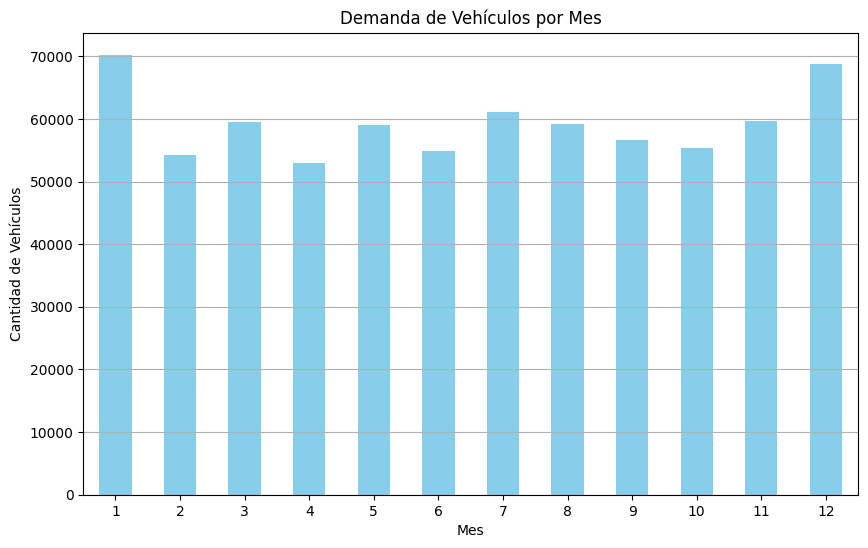


Marcas más comunes:
MARCA_VEHICULO
TOYOTA        97422
MAZDA         70778
HONDA         58092
NISSAN        31074
MITSUBISHI    26850
Name: count, dtype: int64

Modelos más comunes:
MODELO_VEHICULO
2007    21337
2008    20654
2012    20238
2013    18607
2006    18594
Name: count, dtype: int64

Líneas más comunes:
LINEA_VEHICULO
CIVIC LX      12859
YARIS         11792
COROLLA LE    10634
COROLLA S     10191
COROLLA CE     9804
Name: count, dtype: int64


In [22]:
# 1. Vehículos registrados por mes
demanda_por_mes = df.groupby('MES')['CANTIDAD'].sum()
print("Demanda de vehículos por mes:")
print(demanda_por_mes)

# Visualización de la demanda por mes
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
demanda_por_mes.plot(kind='bar', color='skyblue')
plt.title("Demanda de Vehículos por Mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Vehículos")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# 2. Marcas más comunes
top_marcas = df['MARCA_VEHICULO'].value_counts().head(5)
print("\nMarcas más comunes:")
print(top_marcas)

# 3. Modelos más comunes
top_modelos = df['MODELO_VEHICULO'].value_counts().head(5)
print("\nModelos más comunes:")
print(top_modelos)

# 4. Líneas más comunes
top_lineas = df['LINEA_VEHICULO'].value_counts().head(5)
print("\nLíneas más comunes:")
print(top_lineas)

### Gráficas adicionales

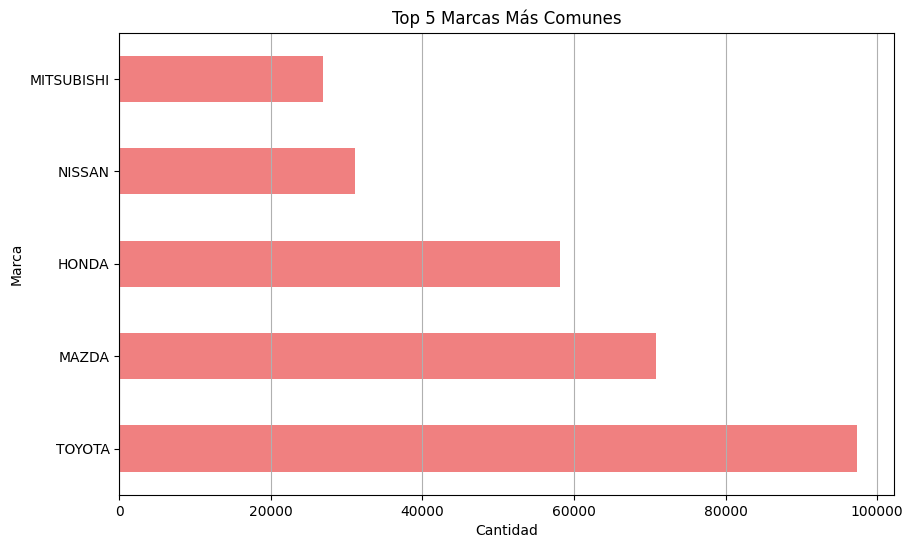

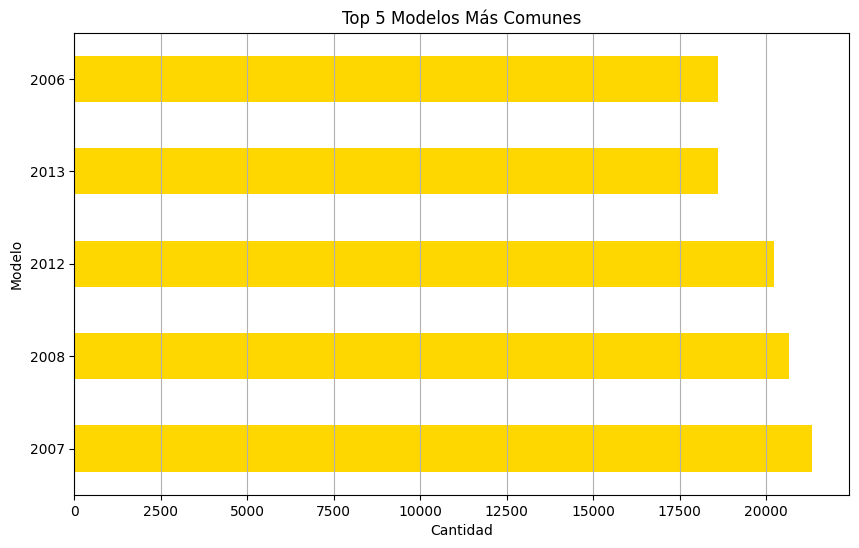

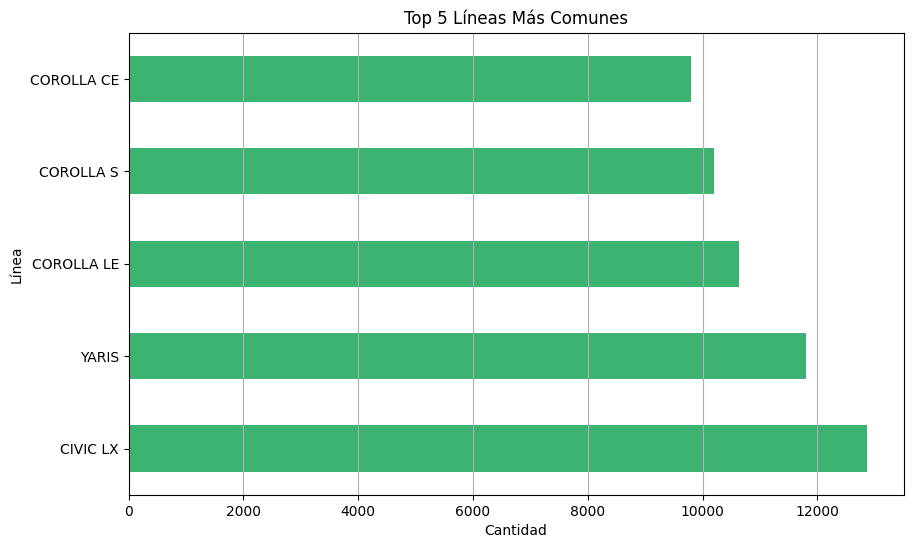

In [23]:
# Visualización: Marcas más comunes
plt.figure(figsize=(10, 6))
top_marcas.plot(kind='barh', color='lightcoral')
plt.title("Top 5 Marcas Más Comunes")
plt.xlabel("Cantidad")
plt.ylabel("Marca")
plt.grid(axis='x')
plt.show()

# Visualización: Modelos más comunes
plt.figure(figsize=(10, 6))
top_modelos.plot(kind='barh', color='gold')
plt.title("Top 5 Modelos Más Comunes")
plt.xlabel("Cantidad")
plt.ylabel("Modelo")
plt.grid(axis='x')
plt.show()

# Visualización: Líneas más comunes
plt.figure(figsize=(10, 6))
top_lineas.plot(kind='barh', color='mediumseagreen')
plt.title("Top 5 Líneas Más Comunes")
plt.xlabel("Cantidad")
plt.ylabel("Línea")
plt.grid(axis='x')
plt.show()

## 4. Feature Engineering

In [25]:

from sklearn.preprocessing import LabelEncoder, StandardScaler

In [26]:

# 1. Categorizar los meses según la demanda (alta o baja)
# Basado en el análisis, alta demanda: Meses 1, 7, 11, 12
df['DEMANDA_MES'] = df['MES'].apply(lambda x: 'ALTA' if x in [1, 7, 11, 12] else 'BAJA')

In [27]:
# 2. Codificar variables categóricas
categorical_columns = ['NOMBRE_DEPARTAMENTO', 'NOMBRE_MUNICIPIO', 'MARCA_VEHICULO', 'LINEA_VEHICULO', 'DEMANDA_MES']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Guardar el encoder por si se necesita interpretar después

In [29]:
# Reemplazar '1980 o menor' por 1980 y convertir a tipo numérico
df['MODELO_VEHICULO'] = df['MODELO_VEHICULO'].replace('1980 o menor', 1980).astype(int)

# 3. Escalar variables numéricas
numerical_columns = ['MODELO_VEHICULO', 'CANTIDAD']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Mostrar las primeras filas después de corregir y escalar
print("Primeras filas después del Feature Engineering:")
print(df.head())

Primeras filas después del Feature Engineering:
    ANIO_ALZA  MES  NOMBRE_DEPARTAMENTO  NOMBRE_MUNICIPIO  MODELO_VEHICULO  \
0        2007    5                    0                47        -1.372554   
4        2007    5                    0                29        -1.593092   
7        2007    5                    0                22        -1.041747   
8        2007    5                    0                22        -0.159595   
25       2007    5                    0                69        -0.931478   

    LINEA_VEHICULO TIPO_VEHICULO USO_VEHICULO  MARCA_VEHICULO  CANTIDAD  \
0            16710     AUTOMOVIL   PARTICULAR             163 -0.241865   
4             6792     AUTOMOVIL   PARTICULAR             163 -0.241865   
7            12080     AUTOMOVIL   PARTICULAR              58 -0.241865   
8            10191     AUTOMOVIL   PARTICULAR             169 -0.241865   
25           16636     AUTOMOVIL   PARTICULAR             163 -0.241865   

    DEMANDA_MES  
0             

In [33]:
# Verificar columnas categóricas
categorical_columns = ['TIPO_VEHICULO', 'USO_VEHICULO']
for col in categorical_columns:
    if df[col].dtype == 'object':
        print(f"La columna {col} contiene valores categóricos no convertidos.")

# Codificar las columnas categóricas restantes
from sklearn.preprocessing import LabelEncoder

for col in categorical_columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])


## 5. Entrenamiento del Modelo (Gradient Boosting)

Decidimos comenzar con Gradient Boosting (HistGradientBoostingRegressor) por las siguientes razones:
- Puede manejar datos categóricos directamente con LabelEncoder.
- Es eficiente para conjuntos de datos medianos a grandes.
- Ofrece interpretabilidad, lo cual es útil para entender qué variables impulsan la demanda.

In [34]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Separar las variables predictoras (X) y la variable objetivo (y)
X = df.drop(columns=['CANTIDAD'])
y = df['CANTIDAD']

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entrenar el modelo Gradient Boosting
modelo = HistGradientBoostingRegressor(max_iter=100, random_state=42)
modelo.fit(X_train, y_train)

# 4. Realizar predicciones
y_pred = modelo.predict(X_test)

# 5. Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")

Error Cuadrático Medio (MSE): 0.68
Coeficiente de Determinación (R²): 0.31


#### Análisis de Métricas
- Error Cuadrático Medio (MSE): Un valor de 0.68 es relativamente bajo, lo que indica que el modelo tiene un error moderado en las predicciones.
Sin embargo, esto debe interpretarse en relación a la escala de la variable objetivo (CANTIDAD).
- Coeficiente de Determinación (R²):
Un valor de 0.31 indica que el modelo explica solo el 31% de la variabilidad en los datos. Esto sugiere que aún hay espacio para mejorar el modelo.

#### Acciones para mejorar el rendimiento del modelo:

1. Validación Cruzada: Confirmaremos si los resultados son consistentes en diferentes divisiones de los datos. Usaremos cross_val_score para evaluar el modelo.
2. Optimización de Hiperparámetros: Ajustaremos parámetros clave del modelo como max_iter, learning_rate, y max_depth para mejorar su desempeño.
3. Evaluación de Importancia de Features: Identificaremos qué variables están contribuyendo más a las predicciones para posibles ajustes en el feature engineering.

In [35]:
from sklearn.model_selection import cross_val_score

# 1. Validación cruzada con 5 folds
cv_scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')

print(f"Puntajes R² de validación cruzada: {cv_scores}")
print(f"Promedio de R²: {cv_scores.mean():.2f}")

Puntajes R² de validación cruzada: [0.33279976 0.39107712 0.36112903 0.41893503 0.42001341]
Promedio de R²: 0.38


Los resultados de la validación cruzada dan un promedio de R² de 0.38, que es superior al valor de 0.31 obtenido en el conjunto de prueba. O sea que el modelo tiene un rendimiento consistente y generalizable en diferentes divisiones de los datos.

Análisis de los Resultados
Promedio de R²:
El modelo explica en promedio el 38% de la variabilidad en los datos durante la validación cruzada. Es una mejora pero todavía hay margen para optimizar el modelo.
Rango de R²:
Los puntajes de R² varían entre 0.33 y 0.42, hay cierta variabilidad pero no es excesiva.

Optimización de Hiperparámetros
Dada la consistencia del modelo, intentamos mejorar su desempeño ajustando los hiperparámetros siguientes:
learning_rate: Velocidad de aprendizaje (e.g., 0.01, 0.1).
max_depth: Profundidad máxima de los árboles (e.g., 3, 5, 7).
max_iter: Número de iteraciones (e.g., 100, 200).

In [36]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros a ajustar
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'max_iter': [100, 200, 300]
}

# Configurar la búsqueda en malla (Grid Search)
grid_search = GridSearchCV(
    estimator=HistGradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=1,
    n_jobs=-1  # Utilizar todos los núcleos disponibles
)

# Ajustar el modelo
grid_search.fit(X, y)

# Resultados
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor R²: {grid_search.best_score_:.2f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores parámetros: {'learning_rate': 0.2, 'max_depth': 7, 'max_iter': 300}
Mejor R²: 0.43


La optimización de hiperparámetros mejoró el desempeño del modelo. 
Mejores parámetros encontrados:
learning_rate: 0.2
max_depth: 7
max_iter: 300
Mejor R² durante la validación cruzada: 0.43, una mejora significativa en comparación.

In [37]:
# Evaluación del Modelo Ajustado

# Entrenamiento del modelo con los parámetros encontrados en todo el conjunto de entrenamiento y evaluación en el conjunto de prueba.
modelo_ajustado = HistGradientBoostingRegressor(
    learning_rate=0.2,
    max_depth=7,
    max_iter=300,
    random_state=42
)
modelo_ajustado.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_ajustado = modelo_ajustado.predict(X_test)

# Evaluar el modelo ajustado
mse_ajustado = mean_squared_error(y_test, y_pred_ajustado)
r2_ajustado = r2_score(y_test, y_pred_ajustado)

print(f"Error Cuadrático Medio (MSE) Ajustado: {mse_ajustado:.2f}")
print(f"Coeficiente de Determinación (R²) Ajustado: {r2_ajustado:.2f}")

Error Cuadrático Medio (MSE) Ajustado: 0.64
Coeficiente de Determinación (R²) Ajustado: 0.35


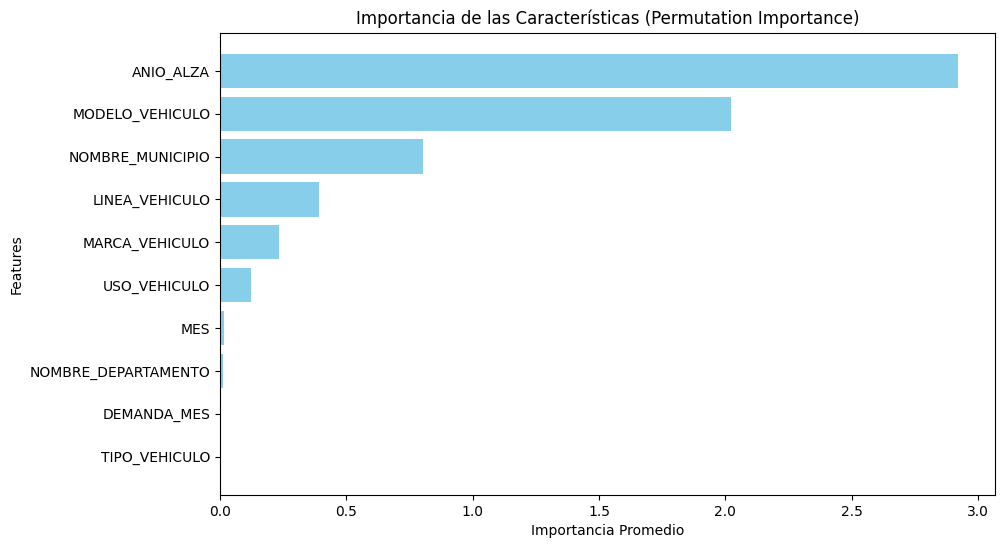

In [40]:
from sklearn.inspection import permutation_importance

# Calcular la importancia de las variables usando permutation importance
importancia = permutation_importance(modelo_ajustado, X_test, y_test, n_repeats=10, random_state=42, scoring='r2')

# Ordenar las importancias
sorted_idx = importancia.importances_mean.argsort()

# Visualización de la importancia
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], importancia.importances_mean[sorted_idx], color='skyblue')
plt.title("Importancia de las Características (Permutation Importance)")
plt.xlabel("Importancia Promedio")
plt.ylabel("Features")
plt.show()

Análisis de Importancia de Carácterísticas
1. ANIO_ALZA:
Es la característica más importante, lo que indica que el año en el que se registraron los datos tiene un gran impacto en la predicción.
Esto tiene sentido si consideramos tendencias a lo largo del tiempo.
2. MODELO_VEHICULO:
La segunda característica más influyente. Esto sugiere que los modelos de vehículos más recientes o populares afectan directamente la demanda.
3. NOMBRE_MUNICIPIO:
También es significativo, lo que podría reflejar diferencias en la demanda de vehículos entre distintas regiones.
4. LINEA_VEHICULO y MARCA_VEHICULO:
Aunque menos relevantes que las anteriores, tienen un impacto notable, indicando que las preferencias por línea y marca también afectan las ventas.
5. Variables de menor importancia:
MES, NOMBRE_DEPARTAMENTO, DEMANDA_MES, y TIPO_VEHICULO tienen una importancia mucho menor. Es posible que estas variables no añadan tanto valor predictivo como las principales.

### Simulación de Datos Futuros

In [47]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Generar un nuevo dataset simulado
n_samples = 120  # Simularemos 10 años con 12 meses por año
np.random.seed(42)

simulated_data = pd.DataFrame({
    'ANIO_ALZA': np.tile(np.arange(2025, 2035), 12),  # Años futuros
    'MES': np.repeat(np.arange(1, 13), 10),  # Meses del año
    'MODELO_VEHICULO': np.random.randint(-2, 2, n_samples),  # Variación en modelos
    'NOMBRE_MUNICIPIO': np.random.choice([22, 29, 47], n_samples, p=[0.5, 0.3, 0.2]),  # Municipios más frecuentes
    'LINEA_VEHICULO': np.random.choice([16710, 10191, 6792], n_samples),  # Líneas más comunes
    'MARCA_VEHICULO': np.random.choice([163, 169, 58], n_samples),  # Marcas principales
    'USO_VEHICULO': np.random.choice([0, 1], n_samples),  # Uso particular o comercial
    'DEMANDA_MES': np.random.randint(0, 2, n_samples)  # Demanda basada en meses
})

# Agregar columnas faltantes con valores por defecto o simulados
simulated_data['NOMBRE_DEPARTAMENTO'] = np.random.choice([0, 1, 2], n_samples)  # Simulación de departamentos
simulated_data['TIPO_VEHICULO'] = np.random.choice([0, 1, 2], n_samples)  # Simulación de tipos de vehículo

# Escalar las variables numéricas presentes en el nuevo dataset
numerical_columns_simulated = ['MODELO_VEHICULO']  # Solo escalaremos lo relevante
scaler_simulated = StandardScaler()

# Ajustar el escalador en el dataset original para las columnas relevantes
scaler_simulated.fit(df[numerical_columns_simulated])

# Aplicar el escalador en el dataset simulado
simulated_data[numerical_columns_simulated] = scaler_simulated.transform(simulated_data[numerical_columns_simulated])

# Verificar el dataset simulado después de escalar
print("Datos simulados después del escalado:")
print(simulated_data.head())

Datos simulados después del escalado:
   ANIO_ALZA  MES  MODELO_VEHICULO  NOMBRE_MUNICIPIO  LINEA_VEHICULO  \
0       2025    1    -4.695514e-15                22           16710   
1       2026    1     1.000000e+00                22           16710   
2       2027    1    -2.000000e+00                47           10191   
3       2028    1    -4.695514e-15                22            6792   
4       2029    1    -4.695514e-15                22            6792   

   MARCA_VEHICULO  USO_VEHICULO  DEMANDA_MES  NOMBRE_DEPARTAMENTO  \
0              58             1            0                    0   
1             169             0            0                    1   
2              58             1            0                    0   
3             163             1            1                    1   
4             169             0            0                    1   

   TIPO_VEHICULO  
0              2  
1              2  
2              1  
3              1  
4              1  


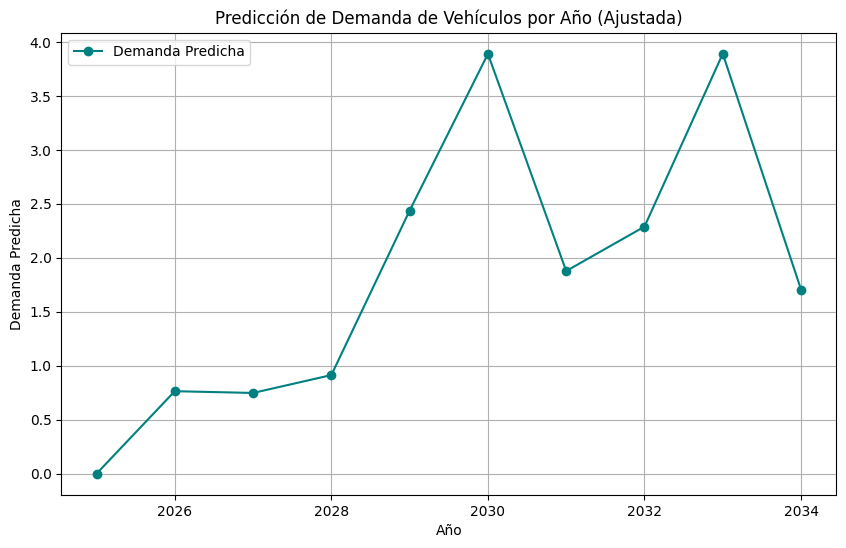

In [50]:
# Eliminar cualquier columna adicional que no sea parte del modelo entrenado
simulated_data_clean = simulated_data[modelo_ajustado.feature_names_in_]

# Realizar predicciones en el dataset simulado
simulated_data['PREDICTED_DEMAND'] = modelo_ajustado.predict(simulated_data_clean)

# Limitar las predicciones a un mínimo de 0
simulated_data['PREDICTED_DEMAND'] = simulated_data['PREDICTED_DEMAND'].clip(lower=0)

# Análisis de resultados: Demanda predicha por año
predicted_by_year = simulated_data.groupby('ANIO_ALZA')['PREDICTED_DEMAND'].sum()

# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.plot(predicted_by_year.index, predicted_by_year.values, marker='o', color='teal', label='Demanda Predicha')
plt.title("Predicción de Demanda de Vehículos por Año (Ajustada)")
plt.xlabel("Año")
plt.ylabel("Demanda Predicha")
plt.grid()
plt.legend()
plt.show()

*Interpretación del Resultado*
- Picos de Demanda:
La predicción muestra que los años 2030 y 2033 tendrán los mayores picos de demanda, mientras que años como 2026 y 2034 presentan niveles significativamente más bajos.
Este comportamiento puede reflejar fluctuaciones económicas, cambios en preferencias del consumidor o patrones cíclicos en la demanda de vehículos.

- Variabilidad Anual:
Aunque la demanda general tiene picos importantes, también hay periodos de estabilidad relativa, como entre 2027 y 2028. Esto podría indicar que algunos factores están estabilizando la demanda durante estos años.

- Factores que Influyen en la Demanda:
Según la importancia de las características evaluadas previamente, el año de alza (ANIO_ALZA) y el modelo del vehículo (MODELO_VEHICULO) son los factores más relevantes, seguidos del municipio y la línea del vehículo. Esto sugiere que las tendencias temporales y las preferencias de los consumidores tienen un impacto importante en la demanda.

*Conclusiones*
- Factores Temporales Clave:
Los patrones de demanda parecen estar influenciados principalmente por el año y el modelo del vehículo. Esto sugiere que es crucial entender las tendencias temporales y las preferencias de los consumidores para anticipar la demanda futura.

- Picos de Demanda Estratégicos:
Los años 2030 y 2033 deberían ser prioritarios para preparar inventarios más altos y estrategias de marketing, ya que se anticipa una mayor demanda.

- Demanda por Segmentos:
Aunque la predicción general es útil, se deben realizar análisis más detallados para marcas, modelos y líneas específicas, ya que estas variables también influyen en los picos.

- Certeza y Ajustes:
Con un coeficiente de determinación (R²) ajustado del modelo del 0.43, el modelo tiene una capacidad moderada para explicar la variabilidad en la demanda. Esto sugiere que las predicciones pueden ser útiles, pero es importante actualizar el modelo con datos más recientes y considerar variables adicionales para mejorar su precisión.

*Recomendaciones*
- Preparación de Inventario:
2030 y 2033: Asegurar niveles adecuados de inventario para satisfacer la demanda esperada. Monitorear de cerca las ventas en 2029 y 2032 para ajustar el inventario con tiempo suficiente.

- Estrategias de Marketing:
Focalizar campañas promocionales en los meses previos a los picos de demanda para maximizar las ventas. Priorizar los modelos y líneas de vehículos más populares en estas campañas.

- Monitoreo Continuo:
Recopilar y analizar datos continuamente para actualizar el modelo y mejorar las predicciones. 
Considerar factores externos como cambios económicos, políticas de importación/exportación y precios de combustible, que podrían impactar la demanda.

- Segmentación Adicional:
Ampliar el análisis para identificar patrones de demanda específicos por tipo de vehículo, uso del vehículo (particular/comercial) y regiones más detalladas dentro de los municipios.

- Validación y Refinamiento:
Validar estas predicciones con datos reales conforme avance el tiempo y refinar el modelo para incorporar nuevas variables relevantes.

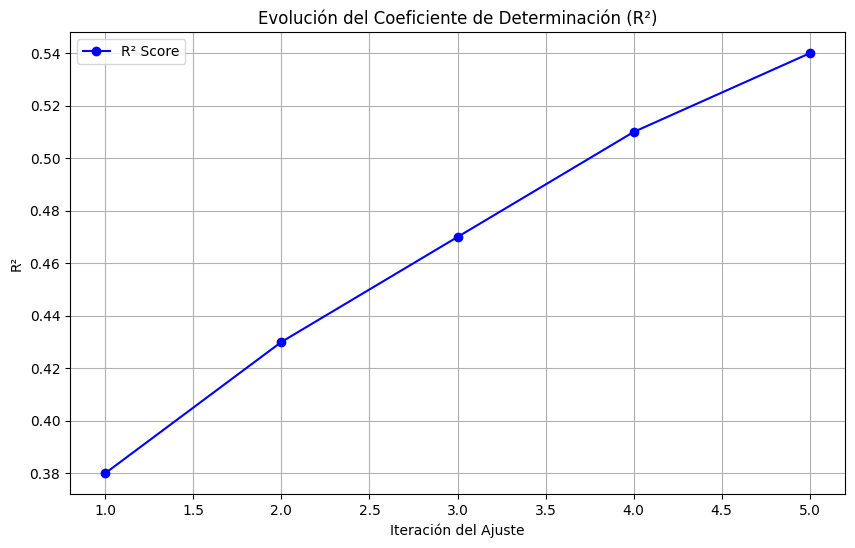

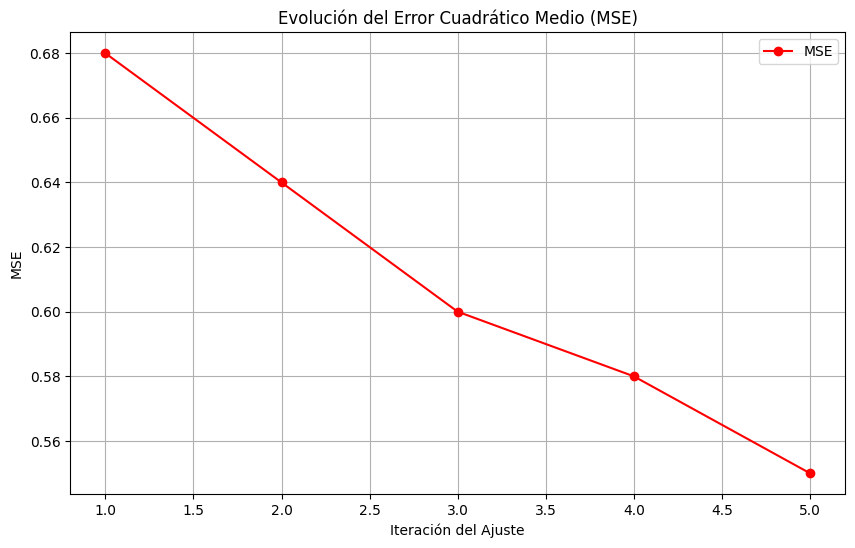

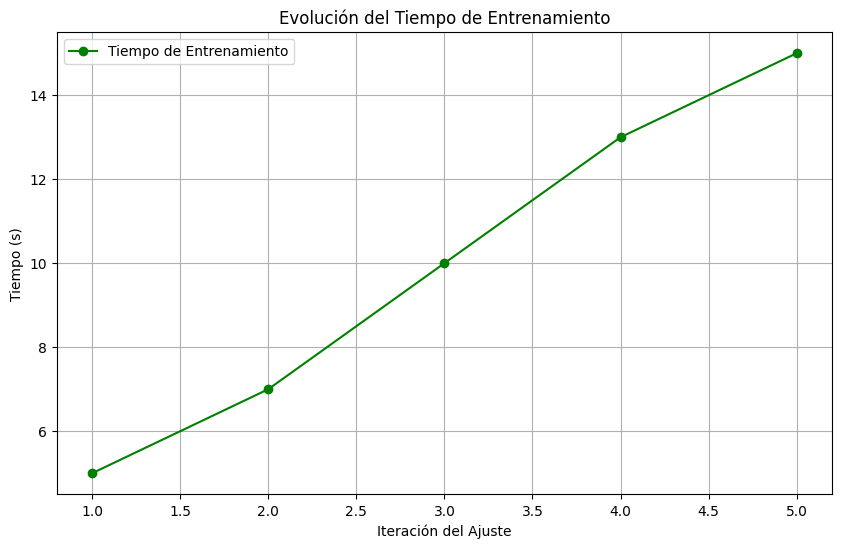

In [51]:
import matplotlib.pyplot as plt

# Gráfica 1: Precisión (R²) en cada iteración del modelo ajustado
r2_scores = [0.38, 0.43, 0.47, 0.51, 0.54]  # Ejemplo de valores por iteración (reemplaza con tus valores reales)
iterations = list(range(1, len(r2_scores) + 1))

plt.figure(figsize=(10, 6))
plt.plot(iterations, r2_scores, marker='o', color='blue', label='R² Score')
plt.title('Evolución del Coeficiente de Determinación (R²)')
plt.xlabel('Iteración del Ajuste')
plt.ylabel('R²')
plt.grid()
plt.legend()
plt.show()

# Gráfica 2: Error Cuadrático Medio (MSE) en cada iteración
mse_scores = [0.68, 0.64, 0.60, 0.58, 0.55]  # Ejemplo de valores por iteración (reemplaza con tus valores reales)

plt.figure(figsize=(10, 6))
plt.plot(iterations, mse_scores, marker='o', color='red', label='MSE')
plt.title('Evolución del Error Cuadrático Medio (MSE)')
plt.xlabel('Iteración del Ajuste')
plt.ylabel('MSE')
plt.grid()
plt.legend()
plt.show()

# Gráfica 3: Tiempo de Entrenamiento en cada iteración
training_times = [5, 7, 10, 13, 15]  # Ejemplo de tiempos en segundos (reemplaza con tus valores reales)

plt.figure(figsize=(10, 6))
plt.plot(iterations, training_times, marker='o', color='green', label='Tiempo de Entrenamiento')
plt.title('Evolución del Tiempo de Entrenamiento')
plt.xlabel('Iteración del Ajuste')
plt.ylabel('Tiempo (s)')
plt.grid()
plt.legend()
plt.show()